# Autoencoders in Tensorflow

Submitted by:  Rehnuma Shabnam Ananya-rehnuma.ananya@st.ovgu.de , Nasim Uddin Ahmed-nasim.ahmed@st.ovgu.de


In [0]:
from keras.layers import Input, Dense
from keras.models import Model


encoding_dim = 32  

input_img = Input(shape=(784,))
# encoded
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded
decoded = Dense(784, activation='sigmoid')(encoded)

# reconstruction
autoencoder = Model(input_img, decoded)

In [0]:
encoder = Model(input_img, encoded)

In [0]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3618 - val_loss: 0.2713
Epoch 2/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.2639 - val_loss: 0.2527
Epoch 3/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.2425 - val_loss: 0.2300
Epoch 4/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.2226 - val_loss: 0.2127
Epoch 5/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2080 - val_loss: 0.2003
Epoch 6/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1970 - val_loss: 0.1907
Epoch 7/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1882 - val_loss: 0.1829
Epoch 8/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1811 - val_loss: 0.1766
Epoch 9/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1752 - val_loss: 0.1710
Epoch

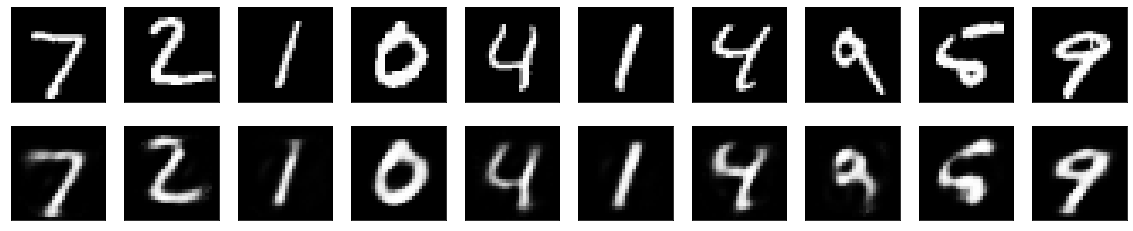

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional Autoencoders

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model


In [0]:
input_img = Input(shape=(28, 28, 1))  


In [0]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


In [0]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [0]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2307 - val_loss: 0.1656
Epoch 2/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.1574 - val_loss: 0.1435
Epoch 3/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.1430 - val_loss: 0.1422
Epoch 4/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1358 - val_loss: 0.1358
Epoch 5/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1312 - val_loss: 0.1335
Epoch 6/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.1280 - val_loss: 0.1305
Epoch 7/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1257 - val_loss: 0.1275
Epoch 8/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1232 - val_loss: 0.1195
Epoch 9/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1214 - val_loss: 0.1195
Epoch

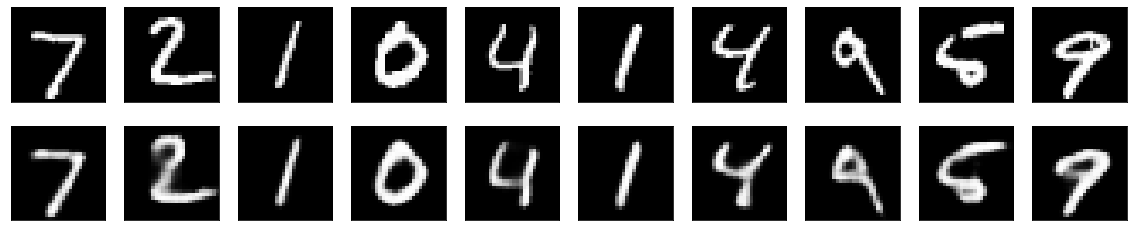

In [0]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n +1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()